In [1]:
# !pip install folium
# !pip install missingno
# !pip install skimpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim
import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

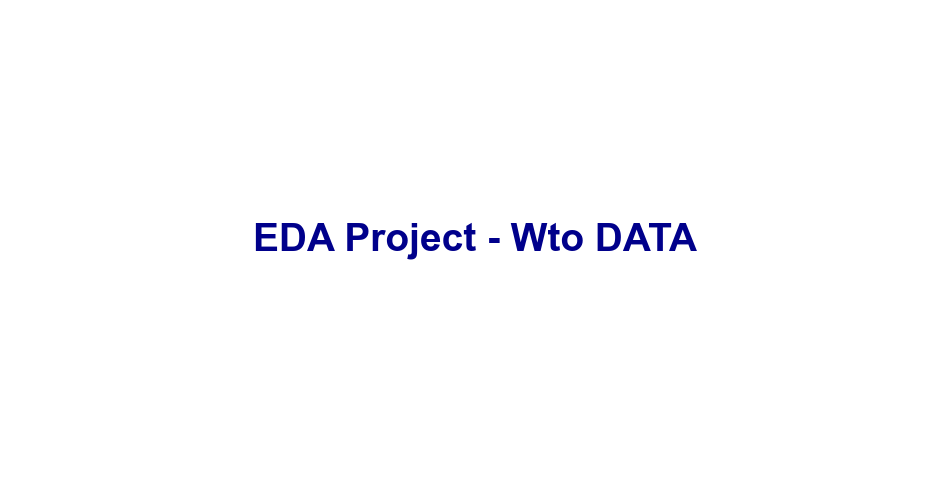

In [3]:
import matplotlib.pyplot as plt

# Başlık stil ayarları
plt.figure(figsize=(12, 6))  # Görüntü boyutu
plt.text(0.5, 0.5, 'EDA Project - Wto DATA', 
         fontsize=28,            # Font boyutu
         color='darkblue',       # Yazı rengi
         fontweight='bold',      # Kalın yazı
         horizontalalignment='center',  # Ortada hizalama
         verticalalignment='center',    # Ortada hizalama
         fontname='Arial')       # Yazı tipi

plt.gca().set_facecolor('white')  # Arka plan rengini beyaz yap
plt.axis('off')  # Eksenleri kapat (sadece metin görünsün)

# Görüntüle
plt.show()

In [4]:
df0 = pd.read_csv('WtoData.csv', encoding="latin1") # LOADED DATASET (DOES NOT WORK CORRECTLY WITHOUT ‘latin1’)
df = df0.copy()

In [5]:
df.sample(7)

Indicator Category Indicator Code  \
30798  Trade in commercial services     ITS_CS_AX6   
65047  Trade in commercial services      ITS_CS_MX   
50421  Trade in commercial services      ITS_CS_MM   
81819  Trade in commercial services      ITS_CS_QM   
90096  Trade in commercial services      ITS_CS_QX   
78139  Trade in commercial services   ITS_CS_MX_GR   
90354  Trade in commercial services      ITS_CS_QX   

                                               Indicator  \
30798  Commercial services exports by sector and part...   
65047  Commercial services exports of selected econom...   
50421  Commercial services imports of selected econom...   
81819  Commercial services imports by main sector  q...   
90096  Commercial services exports by main sector  q...   
78139  Commercial services exports of selected econom...   
90354  Commercial services exports by main sector  q...   

      Reporting Economy Code Reporting Economy ISO3A Code  \
30798                    458                          MYS   
65047                    392                          JPN   
50421                    586                          PAK   
81819                    288                          GHA   
90096                    158                          CHT   
78139                    840                          USA   
90354                    196                          CYP   

              Reporting Economy Partner Economy Code  \
30798                  Malaysia                  392   
65047                     Japan                  000   
50421                  Pakistan                  000   
81819                     Ghana                  000   
90096            Chinese Taipei                  000   
78139  United States of America                  000   
90354                    Cyprus                  000   

      Partner Economy ISO3A Code Partner Economy  \
30798                        JPN           Japan   
65047                        NaN           World   
50421                        NaN           World   
81819                        NaN           World   
90096                        NaN           World   
78139                        NaN           World   
90354                        NaN           World   

      Product/Sector Classification Code  \
30798                               BOP6   
65047                               BOP6   
50421                               BOP6   
81819                               BOP6   
90096                               BOP6   
78139                               BOP6   
90354                               BOP6   

                           Product/Sector Classification Product/Sector Code  \
30798  Services - Extended Balance of Payments Classi...                  SJ   
65047  Services - Extended Balance of Payments Classi...                  SH   
50421  Services - Extended Balance of Payments Classi...                  SG   
81819  Services - Extended Balance of Payments Classi...                  SC   
90096  Services - Extended Balance of Payments Classi...                  SL   
78139  Services - Extended Balance of Payments Classi...                  SB   
90354  Services - Extended Balance of Payments Classi...                  SC   

                                          Product/Sector Period Code  \
30798                            Other business services           A   
65047  Charges for the use of intellectual property n...         M07   
50421                                 Financial services         M06   
81819                                          Transport          Q1   
90096    Memo item: Government goods and services n.i.e.          Q1   
78139             Maintenance and repair services n.i.e.         M11   
90354                                          Transport          Q3   

              Period Frequency Code  Frequency Unit Code  \
30798         Annual              A     Annual       USM   
65047           July              M    Monthly       USM 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97664 entries, 0 to 97663
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Indicator Category                  97664 non-null  object 
 1   Indicator Code                      97664 non-null  object 
 2   Indicator                           97664 non-null  object 
 3   Reporting Economy Code              97664 non-null  object 
 4   Reporting Economy ISO3A Code        93472 non-null  object 
 5   Reporting Economy                   97664 non-null  object 
 6   Partner Economy Code                97664 non-null  object 
 7   Partner Economy ISO3A Code          16293 non-null  object 
 8   Partner Economy                     97664 non-null  object 
 9   Product/Sector Classification Code  97664 non-null  object 
 10  Product/Sector Classification       97664 non-null  object 
 11  Product/Sector Code                 97664

In [7]:
# I checked the number of missing data.
missing_data = df.isnull().sum()
missing_data

Indicator Category                        0
Indicator Code                            0
Indicator                                 0
Reporting Economy Code                    0
Reporting Economy ISO3A Code           4192
Reporting Economy                         0
Partner Economy Code                      0
Partner Economy ISO3A Code            81371
Partner Economy                           0
Product/Sector Classification Code        0
Product/Sector Classification             0
Product/Sector Code                       0
Product/Sector                            0
Period Code                               0
Period                                    0
Frequency Code                            0
Frequency                                 0
Unit Code                                 0
Unit                                      0
Year                                      0
Value Flag Code                       87572
Value Flag                            87572
Text Value                      

In [8]:
new_columns_name = [
    'Indicator_Category', 'Indicator_Code', 'Indicator', 
    'Reporting_Economy_Code', 'Reporting_Economy_ISO3A_Code', 
    'Reporting_Economy', 'Partner_Economy_Code','Partner_Economy_ISO3A_Code', 
    'Partner_Economy', 'Product_Sector_Classification_Code', 
    'Product_Sector_Classification', 'Product_Sector_Code', 
    'Product_Sector', 'Period_Code', 'Period', 'Frequency_Code', 
    'Frequency', 'Unit_Code', 'Unit', 'Year', 'Value_Flag_Code', 
    'Value_Flag', 'Text_Value', 'Value'
]

# I have edited the existing column names to write more neatly and accurately.
df.columns = new_columns_name

In [9]:
# I've replaced spaces and '/' characters with '_' in column names for better readability and Python code compatibility.
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns = [col.replace("/", "_") for col in df.columns]

In [10]:
df.columns

Index(['Indicator_Category', 'Indicator_Code', 'Indicator',
       'Reporting_Economy_Code', 'Reporting_Economy_ISO3A_Code',
       'Reporting_Economy', 'Partner_Economy_Code',
       'Partner_Economy_ISO3A_Code', 'Partner_Economy',
       'Product_Sector_Classification_Code', 'Product_Sector_Classification',
       'Product_Sector_Code', 'Product_Sector', 'Period_Code', 'Period',
       'Frequency_Code', 'Frequency', 'Unit_Code', 'Unit', 'Year',
       'Value_Flag_Code', 'Value_Flag', 'Text_Value', 'Value'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97664 entries, 0 to 97663
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Indicator_Category                  97664 non-null  object 
 1   Indicator_Code                      97664 non-null  object 
 2   Indicator                           97664 non-null  object 
 3   Reporting_Economy_Code              97664 non-null  object 
 4   Reporting_Economy_ISO3A_Code        93472 non-null  object 
 5   Reporting_Economy                   97664 non-null  object 
 6   Partner_Economy_Code                97664 non-null  object 
 7   Partner_Economy_ISO3A_Code          16293 non-null  object 
 8   Partner_Economy                     97664 non-null  object 
 9   Product_Sector_Classification_Code  97664 non-null  object 
 10  Product_Sector_Classification       97664 non-null  object 
 11  Product_Sector_Code                 97664

In [12]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [13]:
df["Year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 97664 entries, 0 to 97663
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
97664 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 763.1 KB


In [14]:
# I have organised it to work under proper headings by converting it into individual categorical data.
df['Indicator_Category'] = df['Indicator_Category'].astype('category')
df['Reporting_Economy'] = df['Reporting_Economy'].astype('category')
df['Partner_Economy'] = df['Partner_Economy'].astype('category')
df['Product_Sector_Classification'] = df['Product_Sector_Classification'].astype('category')
df['Product_Sector'] = df['Product_Sector'].astype('category')
df['Frequency'] = df['Frequency'].astype('category')
df['Unit'] = df['Unit'].astype('category')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97664 entries, 0 to 97663
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Indicator_Category                  97664 non-null  category      
 1   Indicator_Code                      97664 non-null  object        
 2   Indicator                           97664 non-null  object        
 3   Reporting_Economy_Code              97664 non-null  object        
 4   Reporting_Economy_ISO3A_Code        93472 non-null  object        
 5   Reporting_Economy                   97664 non-null  category      
 6   Partner_Economy_Code                97664 non-null  object        
 7   Partner_Economy_ISO3A_Code          16293 non-null  object        
 8   Partner_Economy                     97664 non-null  category      
 9   Product_Sector_Classification_Code  97664 non-null  object        
 10  Product_Sector_Classif

In [16]:
missing_data


Indicator Category                        0
Indicator Code                            0
Indicator                                 0
Reporting Economy Code                    0
Reporting Economy ISO3A Code           4192
Reporting Economy                         0
Partner Economy Code                      0
Partner Economy ISO3A Code            81371
Partner Economy                           0
Product/Sector Classification Code        0
Product/Sector Classification             0
Product/Sector Code                       0
Product/Sector                            0
Period Code                               0
Period                                    0
Frequency Code                            0
Frequency                                 0
Unit Code                                 0
Unit                                      0
Year                                      0
Value Flag Code                       87572
Value Flag                            87572
Text Value                      

In [17]:
# I used ‘skim’ to check, accompanied by a table
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                   Categories                                    │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓                        │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables         ┃                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩                        │
│ │ Number of rows    │ 97664  │ │ string      │ 13    │ │ Indicator_Category            │                        │
│ │ Number of columns │ 23     │ │ category    │ 7     │ │ Reporting_Economy             │                        │
│ └───────────────────┴────────┘ │ float64     │ 2     │ │ Partner_Economy               │                        │
│                                │ datetime64  │ 1     │ │ Product_Sector_Classification │                        │
│                                └─────────────┴───────┘ │ Product_Sector                │                        │
│                                                        │ Frequency                     │                        │
│                                                        │ Unit                          │                        │
│                                                        └───────────────────────────────┘                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA      ┃ NA %  ┃ mean   ┃ sd       ┃ p0     ┃ p25  ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Text_Value    │   97664 │   100 │    nan │      nan │    nan │  nan │    nan │    nan │       nan │        │  │
│ │ Value         │       0 │     0 │  17500 │   285200 │  -2422 │    9 │  91.99 │  876.1 │  27810000 │   ▇    │  │
│ └───────────────┴─────────┴───────┴────────┴──────────┴────────┴──────┴────────┴────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                   ┃ NA      ┃ NA %        ┃ ordered           ┃ unique         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ Indicator_Category                            │       0 │           0 │ False             │              3 │  │
│ │ Reporting_Economy                             │       0 │           0 │ False             │            266 │  │
│ │ Partner_Economy                               │       0 │           0 │ False             │             90 │  │
│ │ Product_Sector_Classification                 │       0 │           0 │ False             │              2 │  │
│ │ Product_Sector                                │       0 │           0 │ False             │            138 │  │
│ │ Frequency                                     │       0 │           0 │ False             │              3 │  │
│ │ Unit                                          │       0 │           0 │ False             │              8 │  │
│ └───────────────────────────────────────────────┴─────────┴─────────────┴───────────────────┴────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first 

In [18]:
df["Text_Value"][:5]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Text_Value, dtype: float64

In [19]:
duplicate_rows = df[df.duplicated()]
duplicate_rows # Have not duplicated rows

Empty DataFrame
Columns: [Indicator_Category, Indicator_Code, Indicator, Reporting_Economy_Code, Reporting_Economy_ISO3A_Code, Reporting_Economy, Partner_Economy_Code, Partner_Economy_ISO3A_Code, Partner_Economy, Product_Sector_Classification_Code, Product_Sector_Classification, Product_Sector_Code, Product_Sector, Period_Code, Period, Frequency_Code, Frequency, Unit_Code, Unit, Year, Value_Flag_Code, Value_Flag, Text_Value, Value]
Index: []

In [20]:
df.duplicated().sum()

0

In [21]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'Cardinality': df.nunique()
})

Count   Null  Cardinality
Indicator_Category                  97664      0            3
Indicator_Code                      97664      0           36
Indicator                           97664      0           36
Reporting_Economy_Code              97664      0          415
Reporting_Economy_ISO3A_Code        93472   4192          215
Reporting_Economy                   97664      0          266
Partner_Economy_Code                97664      0           90
Partner_Economy_ISO3A_Code          16293  81371           84
Partner_Economy                     97664      0           90
Product_Sector_Classification_Code  97664      0            2
Product_Sector_Classification       97664      0            2
Product_Sector_Code                 97664      0          141
Product_Sector                      97664      0          138
Period_Code                         97664      0           17
Period                              97664      0           17
Frequency_Code                      97664      0            3
Frequency                           97664      0            3
Unit_Code                           97664      0            8
Unit                                97664      0            8
Year                                97664      0            3
Value_Flag_Code                     10092  87572            2
Value_Flag                          10092  87572            2
Text_Value                              0  97664            0
Value                               97664      0        62063

In [22]:
df.sample(2)

Indicator_Category Indicator_Code  \
95587  Trade in commercial services      ITS_CS_QX   
68093  Trade in commercial services      ITS_CS_MX   

                                               Indicator  \
95587  Commercial services exports by main sector  q...   
68093  Commercial services exports of selected econom...   

      Reporting_Economy_Code Reporting_Economy_ISO3A_Code Reporting_Economy  \
95587                    705                          SVN          Slovenia   
68093                    608                          PHL       Philippines   

      Partner_Economy_Code Partner_Economy_ISO3A_Code Partner_Economy  \
95587                  000                        NaN           World   
68093                  000                        NaN           World   

      Product_Sector_Classification_Code  \
95587                               BOP6   
68093                               BOP6   

                           Product_Sector_Classification Product_Sector_Code  \
95587  Services - Extended Balance of Payments Classi...                  SD   
68093  Services - Extended Balance of Payments Classi...                 SOX   

            Product_Sector Period_Code         Period Frequency_Code  \
95587               Travel          Q3  Third Quarter              Q   
68093  Commercial services         M10        October              M   

       Frequency Unit_Code               Unit       Year Value_Flag_Code  \
95587  Quarterly       USM  Million US dollar 2021-01-01             NaN   
68093    Monthly       USM  Million US dollar 2021-01-01             NaN   

      Value_Flag  Text_Value        Value  
95587        NaN         NaN   892.114693  
68093        NaN         NaN  2800.797663

## Indicator_Category Column

In [23]:
df["Indicator_Category"].unique()

['Merchandise trade - indices and prices', 'Merchandise trade values', 'Trade in commercial services']
Categories (3, object): ['Merchandise trade - indices and prices', 'Merchandise trade values', 'Trade in commercial services']

In [24]:
category_mapping = {
    'Merchandise trade - indices and prices': 'Merchandise_Trade',
    'Merchandise trade values': 'Merchandise_Trade',
    'Trade in commercial services': 'Services_Trade'
}

# Apply the mapping to the 'Indicator_Category' column
df['Indicator_Category'] = df['Indicator_Category'].map(category_mapping)

# Check unique values after mapping
print(df['Indicator_Category'].unique())

['Merchandise_Trade' 'Services_Trade']


In [25]:
df["Indicator_Category"].isna().sum()

0

## Indicator_Code Column

In [26]:
df.Indicator_Code.unique()

array(['ITS_MTP_AM', 'ITS_MTP_AMF', 'ITS_MTP_AMV', 'ITS_MTP_AMVF',
       'ITS_MTP_AMVG', 'ITS_MTP_AUVM', 'ITS_MTP_AUVMF', 'ITS_MTP_AUVX',
       'ITS_MTP_AUVXF', 'ITS_MTP_AX', 'ITS_MTP_AXF', 'ITS_MTP_AXV',
       'ITS_MTP_AXVF', 'ITS_MTP_AXVG', 'ITS_MTP_MMP', 'ITS_MTP_MMPM',
       'ITS_MTP_MXP', 'ITS_MTP_MXPM', 'ITS_MTP_QMV', 'ITS_MTP_QMVSA',
       'ITS_MTP_QXV', 'ITS_MTP_QXVSA', 'ITS_MTV_AM', 'ITS_MTV_AX',
       'ITS_MTV_MM', 'ITS_MTV_MX', 'ITS_MTV_QM', 'ITS_MTV_QX',
       'ITS_CS_AM6', 'ITS_CS_AX6', 'ITS_CS_MM', 'ITS_CS_MM_GR',
       'ITS_CS_MX', 'ITS_CS_MX_GR', 'ITS_CS_QM', 'ITS_CS_QX'],
      dtype=object)

In [27]:
df.Indicator_Code.nunique()

36

In [28]:
df.Indicator_Code.isna().sum()

0

## Indicator Column

In [29]:
df["Indicator"].unique()

array(['Merchandise import value chained indices - annual',
       'Merchandise import value fixed-base indices - annual',
       'Merchandise import volume chained indices - annual',
       'Merchandise import volume fixed-base indices - annual',
       'Merchandise import volume change - annual',
       'Merchandise import unit value chained indices - annual',
       'Merchandise import unit value fixed-base indices - annual',
       'Merchandise export unit value chained indices - annual',
       'Merchandise export unit value fixed-base indices - annual',
       'Merchandise export value chained indices - annual',
       'Merchandise export value fixed-base indices - annual',
       'Merchandise export volume chained indices - annual',
       'Merchandise export volume fixed-base indices - annual',
       'Merchandise export volume change - annual',
       'Import price changes of manufactured goods - monthly',
       'Import price indices of manufactured goods - monthly',
       '

In [30]:
df["Indicator"].nunique()

36

In [31]:
df['Indicator'] = df['Indicator'].str.replace(r'\x96', '-', regex=True)  # Replace '\x96' with '-'
df['Indicator'] = df['Indicator'].str.strip() # Remove leading and trailing whitespace
df['Indicator'] = df['Indicator'].str.title() # Standardize text formatting (convert to title case for readability)


In [32]:
df["Indicator"].unique()

array(['Merchandise Import Value Chained Indices - Annual',
       'Merchandise Import Value Fixed-Base Indices - Annual',
       'Merchandise Import Volume Chained Indices - Annual',
       'Merchandise Import Volume Fixed-Base Indices - Annual',
       'Merchandise Import Volume Change - Annual',
       'Merchandise Import Unit Value Chained Indices - Annual',
       'Merchandise Import Unit Value Fixed-Base Indices - Annual',
       'Merchandise Export Unit Value Chained Indices - Annual',
       'Merchandise Export Unit Value Fixed-Base Indices - Annual',
       'Merchandise Export Value Chained Indices - Annual',
       'Merchandise Export Value Fixed-Base Indices - Annual',
       'Merchandise Export Volume Chained Indices - Annual',
       'Merchandise Export Volume Fixed-Base Indices - Annual',
       'Merchandise Export Volume Change - Annual',
       'Import Price Changes Of Manufactured Goods - Monthly',
       'Import Price Indices Of Manufactured Goods - Monthly',
       '

## Reporting_Economy_Code Column

In [33]:
df.Reporting_Economy_Code.unique()

array(['000', '004', '008', '012', '016', '024', '028', '031', '032',
       '036', '040', '044', '048', '050', '051', '052', '056', '060',
       '064', '068', '070', '072', '076', '084', '090', '096', '100',
       '104', '108', '112', '116', '120', '124', '132', '136', '140',
       '144', '148', '152', '156', '158', '170', '174', '178', '180',
       '184', '188', '191', '192', '196', '203', '204', '208', '212',
       '214', '218', '222', '226', '231', '232', '233', '242', '246',
       '250', '258', '262', '266', '268', '270', '276', '288', '296',
       '300', '304', '308', '316', '320', '324', '328', '332', '340',
       '344', '348', '352', '356', '360', '364', '368', '372', '376',
       '380', '384', '388', '392', '398', '400', '404', '408', '410',
       '414', '417', '418', '422', '426', '428', '430', '434', '440',
       '442', '446', '450', '454', '458', '462', '466', '470', '478',
       '480', '484', '496', '498', '500', '504', '508', '512', '516',
       '520', '524',

In [34]:
df.Reporting_Economy_Code.isna().sum()

0

In [35]:
df.head(1)

Indicator_Category Indicator_Code  \
0  Merchandise_Trade     ITS_MTP_AM   

                                           Indicator Reporting_Economy_Code  \
0  Merchandise Import Value Chained Indices - Annual                    000   

  Reporting_Economy_ISO3A_Code Reporting_Economy Partner_Economy_Code  \
0                          NaN             World                  000   

  Partner_Economy_ISO3A_Code Partner_Economy  \
0                        NaN           World   

  Product_Sector_Classification_Code  \
0                              SITC3   

                Product_Sector_Classification Product_Sector_Code  \
0  Merchandise - SITC Revision 3 (aggregates)                  TO   

      Product_Sector Period_Code  Period Frequency_Code Frequency Unit_Code  \
0  Total merchandise           A  Annual              A    Annual       IDP   

                Unit       Year Value_Flag_Code Value_Flag  Text_Value  \
0  Previous year=100 2021-01-01             NaN        NaN         NaN   

     Value  
0  126.432

## Reporting_Economy_ISO3A_Code Column 

In [36]:
df.Reporting_Economy_ISO3A_Code.unique()

array([nan, 'AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS',
       'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU', 'BTN',
       'BOL', 'BIH', 'BWA', 'BRA', 'BLZ', 'SLB', 'BRN', 'BGR', 'MMR',
       'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'LKA',
       'TCD', 'CHL', 'CHN', 'CHT', 'COL', 'COM', 'COG', 'COD', 'COK',
       'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA', 'DOM',
       'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FJI', 'FIN', 'FRA',
       'PYF', 'DJI', 'GAB', 'GEO', 'GMB', 'DEU', 'GHA', 'KIR', 'GRC',
       'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT',
       'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', 'MNG', 'MDA', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM', 'NRU',
       'NPL', '

In [37]:
frequency = df["Reporting_Economy_ISO3A_Code"].value_counts().reset_index()
frequency.columns = ['ISO3_Code', 'Count']
frequency

ISO3_Code  Count
0         USA  11867
1         GBR   5995
2         KOR   3166
3         PRT   2457
4         JPN   2352
5         UKR   2338
6         MKD   2062
7         BRA   1864
8         SRB   1735
9         BGR   1689
10        PHL   1675
11        MNG   1671
12        DEU   1634
13        TUR   1572
14        FRA   1543
15        ROM   1537
16        CHN   1532
17        PAK   1469
18        ITA   1222
19        EEC   1166
20        TZA   1041
21        CAN    930
22        AUS    927
23        SVN    856
24        MYS    850
25        RUS    711
26        GRC    672
27        LVA    626
28        MAR    567
29        SVK    482
30        SWE    482
31        LUX    482
32        BEL    482
33        HUN    476
34        EST    476
35        CZE    476
36        POL    474
37        LTU    462
38        KEN    444
39        HRV    444
40        BGD    441
41        MLT    440
42        FIN    434
43        IND    420
44        DNK    416
45        ESP    406
46        BLR    389
47        SGP    382
48        PER    372
49        KAZ    372
50        BOL    372
51        ECU    370
52        SLV    354
53        ALB    353
54        GTM    350
55        ARG    349
56        URY    344
57        CHE    344
58        NOR    340
59        BIH    337
60        DOM    334
61        ARM    333
62        NLD    326
63        CHT    326
64        AUT    318
65        IRL    310
66        ISL    310
67        BLZ    310
68        AGO    310
69        UZB    310
70        CPV    308
71        COL    307
72        MNE    306
73        MDA    305
74        UGA    304
75        ZAF    300
76        CYP    299
77        CRI    299
78        ZMB    292
79        PAN    290
80        MUS    288
81        THA    287
82        HND    286
83        MEX    282
84        IDN    281
85        TTO    280
86        GIN    279
87        NZL    272
88        PRY    270
89        AZE    270
90        EGY    262
91        KHM    261
92        NAM    260
93        TJK    258
94        ISR    257
95        NGA    253
96        TON    252
97        FJI    243
98        GEO    243
99        NIC    235
100       LKA    234
101       RWA    234
102       KGZ    232
103       MOZ    231
104       SLB    230
105       CHL    225
106       STP    222
107       WSM    219
108       ABW    218
109       HKG    211
110       TUN    210
111       SUR    199
112       LSO    195
113       SWZ    194
114       JAM    194
115       SYC    193
116       SAU    186
117       MDG    182
118       PNG    178
119       TLS    175
120       GMB    172
121       JOR    170
122       CUW    170
123       VUT    161
124       NPL    161
125       GHA    160
126       BMU    157
127       SDN    157
128       SXM    157
129       DZA    154
130       QAT    153
131       LAO    150
132       ZWE    148
133       HTI    141
134       BRN    140
135       MAC    131
136       VNM    130
137       MMR    129
138       BTN    128
139       BHS    127
140       KWT    123
141       ETH    119
142       IRQ    119
143       BWA    106
144       GRD    104
145       KNA    104
146       LCA    104
147       VCT    104
148       ATG    104
149       MSR    104
150       DMA    104
151       MDV     99
152       AIA     90
153       IRN     90
154       NER     90
155       SEN     89
156       VEN     89
157       CIV     88
158       BFA     88
159       MLI     87
160       BEN     84
161       TGO     83
162       SLE     83
163       CMR     82
164       MRT     80
165       BDI     77
166       GAB     76
167       TUV     75
168       TCD     75
169       KIR     74
170       LBR     74
171       BHR     72
172       CAF     72
173       GNQ     72
174       BRB     71
175       COG     70
176       GUY     69
177       MWI     64
178       GNB     60
179       COM     58
180       NRU     55
181       ARE     55
182       YEM     52
183       COD     48
184       OMN     48
185       AFG     47
186       SSD     44
187       DJI     43
188       LBN     40
189       PLW 

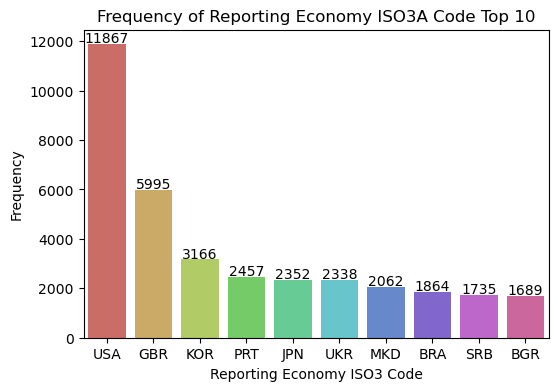

In [38]:
ax = sns.barplot(x="ISO3_Code", y='Count', data=frequency.head(10), palette="hls")
plt.ylabel("Frequency")
plt.xlabel("Reporting Economy ISO3 Code")
plt.title("Frequency of Reporting Economy ISO3A Code Top 10")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', 
                 xytext=(0, 4), textcoords='offset points')

In [39]:
df.Reporting_Economy_ISO3A_Code.isna().sum()

4192

In [40]:
df.Reporting_Economy_ISO3A_Code.isna()
df.head(2)

Indicator_Category Indicator_Code  \
0  Merchandise_Trade     ITS_MTP_AM   
1  Merchandise_Trade     ITS_MTP_AM   

                                           Indicator Reporting_Economy_Code  \
0  Merchandise Import Value Chained Indices - Annual                    000   
1  Merchandise Import Value Chained Indices - Annual                    004   

  Reporting_Economy_ISO3A_Code Reporting_Economy Partner_Economy_Code  \
0                          NaN             World                  000   
1                          AFG       Afghanistan                  000   

  Partner_Economy_ISO3A_Code Partner_Economy  \
0                        NaN           World   
1                        NaN           World   

  Product_Sector_Classification_Code  \
0                              SITC3   
1                              SITC3   

                Product_Sector_Classification Product_Sector_Code  \
0  Merchandise - SITC Revision 3 (aggregates)                  TO   
1  Merchandise - SITC Revision 3 (aggregates)                  TO   

      Product_Sector Period_Code  Period Frequency_Code Frequency Unit_Code  \
0  Total merchandise           A  Annual              A    Annual       IDP   
1  Total merchandise           A  Annual              A    Annual       IDP   

                Unit       Year Value_Flag_Code Value_Flag  Text_Value  \
0  Previous year=100 2021-01-01             NaN        NaN         NaN   
1  Previous year=100 2021-01-01               E   Estimate         NaN   

     Value  
0  126.432  
1   85.260

In [41]:
df.Reporting_Economy_ISO3A_Code.isna()

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [42]:
df["Reporting_Economy_ISO3A_Code"].fillna('USA', inplace=True)

In [43]:
df["Reporting_Economy_ISO3A_Code"].isna().sum()

0

In [44]:
df['Reporting_Economy_ISO3A_Code'].isna().sum()

0

In [45]:
df.Reporting_Economy_ISO3A_Code.unique()

array(['USA', 'AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'AZE', 'ARG',
       'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BLZ', 'SLB', 'BRN', 'BGR',
       'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF',
       'LKA', 'TCD', 'CHL', 'CHN', 'CHT', 'COL', 'COM', 'COG', 'COD',
       'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA',
       'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FJI', 'FIN',
       'FRA', 'PYF', 'DJI', 'GAB', 'GEO', 'GMB', 'DEU', 'GHA', 'KIR',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR',
       'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LTU',
       'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT',
       'MUS', 'MEX', 'MNG', 'MDA', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM',
       'NRU', 'NPL',

## Reporting_Economy Column

In [46]:
df["Reporting_Economy"].isna().sum()

0

In [47]:
df["Reporting_Economy"][:10]

0                  World
1            Afghanistan
2                Albania
3                Algeria
4         American Samoa
5                 Angola
6    Antigua and Barbuda
7             Azerbaijan
8              Argentina
9              Australia
Name: Reporting_Economy, dtype: category
Categories (266, object): ['Afghanistan', 'Africa', 'Africa, CIS and Middle East', 'African, Caribbean and Pacific States (ACP)', ..., 'World', 'Yemen', 'Zambia', 'Zimbabwe']

In [48]:
df["Reporting_Economy"].unique()


['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', ..., 'Turks and Caicos Islands', 'Wallis and Futuna Islands', 'OIC (Organisation of Islamic Cooperation)', 'Landlocked developing countries', 'South Sudan']
Length: 266
Categories (266, object): ['Afghanistan', 'Africa', 'Africa, CIS and Middle East', 'African, Caribbean and Pacific States (ACP)', ..., 'World', 'Yemen', 'Zambia', 'Zimbabwe']

In [49]:
unique_values = df["Reporting_Economy"].unique().tolist()

In [50]:
for value in unique_values:
    print(value)

World
Afghanistan
Albania
Algeria
American Samoa
Angola
Antigua and Barbuda
Azerbaijan
Argentina
Australia
Austria
Bahamas
Bahrain, Kingdom of
Bangladesh
Armenia
Barbados
Belgium
Bermuda
Bhutan
Bolivia, Plurinational State of
Bosnia and Herzegovina
Botswana
Brazil
Belize
Solomon Islands
Brunei Darussalam
Bulgaria
Myanmar
Burundi
Belarus
Cambodia
Cameroon
Canada
Cabo Verde
Cayman Islands
Central African Republic
Sri Lanka
Chad
Chile
China
Chinese Taipei
Colombia
Comoros
Congo
Democratic Republic of the Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Benin
Denmark
Dominica
Dominican Republic
Ecuador
El Salvador
Equatorial Guinea
Ethiopia
Eritrea
Estonia
Fiji
Finland
France
French Polynesia
Djibouti
Gabon
Georgia
The Gambia
Germany
Ghana
Kiribati
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guyana
Haiti
Honduras
Hong Kong, China
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Côte d'Ivoire
Jamaica
Japan
Kazakhstan
Jordan
Kenya
Korea, Democratic People's R

In [51]:
#  Further cleaning steps to be conducted by the team as necessary.
# Gerektiğinde ekip tarafından daha ileri temizlik adımları gerçekleştirilecektir.

## Partner_Economy_Code Column

In [52]:
df.Partner_Economy_Code.isna().sum()

0

In [53]:
df.Partner_Economy_Code.unique()

array(['000', '918', 'EUT', '036', '096', '156', '158', '250', '276',
       '344', '356', '360', '380', '392', '410', '528', '554', '586',
       '608', '702', '764', '826', '840', '975', '008', '032', '040',
       '056', '076', '100', '112', '124', '152', '170', '191', '196',
       '203', '208', '233', '246', '300', '348', '352', '364', '372',
       '376', '428', '438', '440', '442', '458', '470', '484', '504',
       '578', '616', '620', '642', '643', '682', '703', '705', '710',
       '724', '752', '756', '792', '804', '818', '858', '862', '892',
       '893', '928', '048', '060', '188', '214', '222', '320', '340',
       '400', '512', '558', '566', '591', '604', '704', '927', 'ZX9'],
      dtype=object)

## Partner_Economy_ISO3A_Code Column

In [54]:
df.Partner_Economy_ISO3A_Code.isna().sum()

81371

In [55]:
missing_values = df['Partner_Economy_ISO3A_Code'].isna().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

83.31729193971167

In [56]:
# The percentage of missing values in the 'Partner_Economy_ISO3A_Code' column is approximately 83.32%.
# Further analysis or data cleaning is required to address this issue.

In [57]:
df.Partner_Economy_ISO3A_Code.unique() 

array([nan, 'EEC', 'AUS', 'BRN', 'CHN', 'CHT', 'FRA', 'DEU', 'HKG', 'IND',
       'IDN', 'ITA', 'JPN', 'KOR', 'NLD', 'NZL', 'PAK', 'PHL', 'SGP',
       'THA', 'GBR', 'USA', 'ALB', 'ARG', 'AUT', 'BEL', 'BRA', 'BGR',
       'BLR', 'CAN', 'CHL', 'COL', 'HRV', 'CYP', 'CZE', 'DNK', 'EST',
       'FIN', 'GRC', 'HUN', 'ISL', 'IRN', 'IRL', 'ISR', 'LVA', 'LIE',
       'LTU', 'LUX', 'MYS', 'MLT', 'MEX', 'MAR', 'NOR', 'POL', 'PRT',
       'ROM', 'RUS', 'SAU', 'SVK', 'SVN', 'ZAF', 'ESP', 'SWE', 'CHE',
       'TUR', 'UKR', 'EGY', 'URY', 'VEN', 'SRB', 'MNE', 'BHR', 'BMU',
       'CRI', 'DOM', 'SLV', 'GTM', 'HND', 'JOR', 'OMN', 'NIC', 'NGA',
       'PAN', 'PER', 'VNM'], dtype=object)

## Partner_Economy Column 

In [58]:
df.Partner_Economy.isna().sum()

0

In [59]:
partner_economy_unique = df.Partner_Economy.unique().to_list() 
partner_economy_unique

['World',
 'European Union',
 'Extra EU Trade',
 'Australia',
 'Brunei Darussalam',
 'China',
 'Chinese Taipei',
 'France',
 'Germany',
 'Hong Kong, China',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Korea, Republic of',
 'Netherlands',
 'New Zealand',
 'Pakistan',
 'Philippines',
 'Singapore',
 'Thailand',
 'United Kingdom',
 'United States of America',
 'Association of Southeast Asian Nations (ASEAN)',
 'Albania',
 'Argentina',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Belarus',
 'Canada',
 'Chile',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Morocco',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Saudi Arabia, Kingdom of',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'Ukraine',
 'Egypt',


In [60]:
replacements = {
    'United States of America': 'USA',
    'Korea, Republic of': 'Korea',
    'Türkiye': 'Turkey',
    'Venezuela, Bolivarian Republic of': 'Venezuela'
}

In [61]:
df['Partner_Economy'] = df['Partner_Economy'].replace(replacements)


## Product_Sector_Classification_Code Column

In [62]:
df.Product_Sector_Classification_Code.isna().sum()

0

In [63]:
df.Product_Sector_Classification_Code.unique() 

array(['SITC3', 'BOP6'], dtype=object)

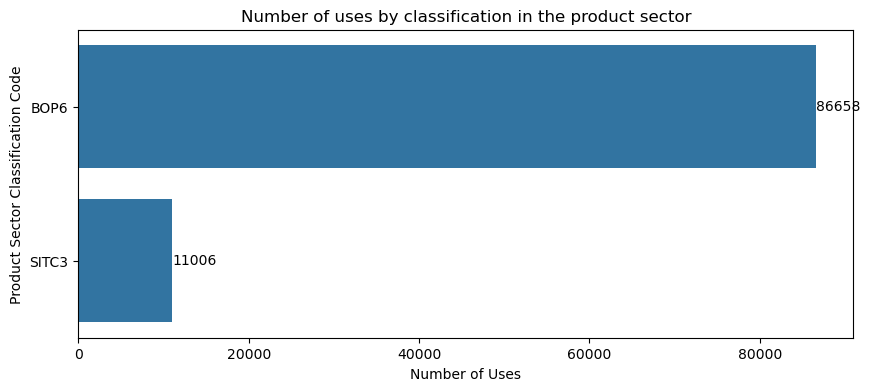

In [64]:
plt.figure(figsize=(10, 4))

ax = sns.countplot(y="Product_Sector_Classification_Code", data=df, order = df['Product_Sector_Classification_Code'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of uses by classification in the product sector")

plt.xlabel("Number of Uses")
plt.ylabel("Product Sector Classification Code")

plt.show()

## Product_Sector_Classification Column

In [65]:
df.Product_Sector_Classification.isna().sum()  

0

In [66]:
product_sector_classification_unique = df.Product_Sector_Classification.unique().to_list() 
product_sector_classification_unique

['Merchandise - SITC Revision 3 (aggregates)',
 'Services - Extended Balance of Payments Classification (EBOPS 2010)']

In [67]:
value_mapping = {
    'Merchandise - SITC Revision 3 (aggregates)': 'Merchandise (SITC Rev. 3)',
    'Services - Extended Balance of Payments Classification (EBOPS 2010)': 'Services (EBOPS 2010)'
    # Another option: 
    # 'Merchandise - SITC Revision 3 (aggregates)': 'Goods',
    # 'Services - Extended Balance of Payments Classification (EBOPS 2010)': 'Services'
}

df["Product_Sector_Classification"] = df["Product_Sector_Classification"].map(value_mapping) 

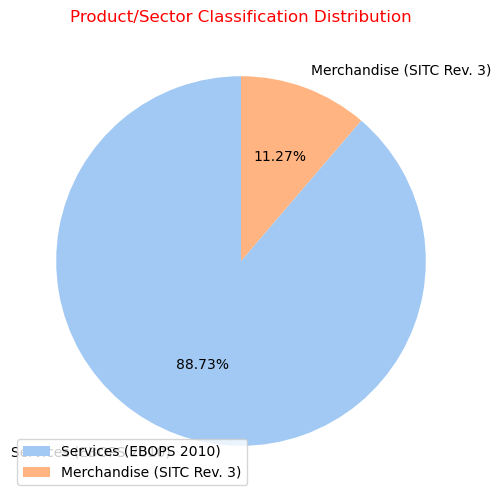

In [68]:
data=df['Product_Sector_Classification'].value_counts()

plt.figure(figsize=(8, 6))  
plt.pie(data, labels=data.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("pastel",4))
plt.title('Product/Sector Classification Distribution',color="red")
plt.legend(loc="best")
plt.show()

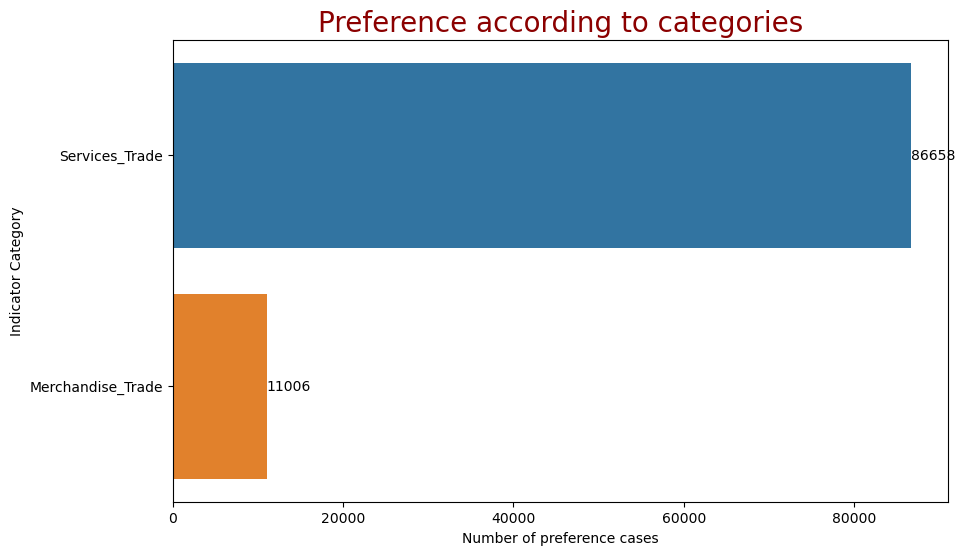

In [69]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(y="Indicator_Category", data=df, order=df['Indicator_Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Preference according to categories", fontdict={'fontsize': 20, 'color': 'darkred'})

plt.xlabel("Number of preference cases")
plt.ylabel("Indicator Category")

plt.show()

## Product_Sector_Code Column

In [70]:
df.Product_Sector_Code.isna().sum()  

0

In [71]:
df.Product_Sector_Code.unique() 

array(['TO', 'MA', 'S', 'SC', 'SC1', 'SC11', 'SC12', 'SC13', 'SC2',
       'SC21', 'SC22', 'SC23', 'SC3', 'SC31', 'SC32', 'SC33', 'SC4',
       'SCA', 'SCB', 'SCC', 'SD', 'SH', 'SK', 'SL', 'SOX', 'SOX1', 'SPX1',
       'SPX4', 'GSOX', 'SA', 'SAY', 'SAZ', 'SB', 'SC11Z', 'SC21Z',
       'SC31Z', 'SCAZ', 'SCC1', 'SDA', 'SDA1', 'SDA2', 'SDB', 'SDB1',
       'SDB2', 'SDB3', 'SE', 'SE1', 'SE2', 'SF', 'SF1', 'SF2', 'SF3',
       'SG', 'SG1', 'SI', 'SI1', 'SI2', 'SI3', 'SJ', 'SJ1', 'SJ2', 'SJ3',
       'SK1', 'SK2', 'SD1', 'SD2', 'SD3', 'SD4', 'SD5', 'SD5Y', 'SD5Z',
       'SDZ', 'SF4', 'SG2', 'SN', 'SH1', 'SH2', 'SH3', 'SH4', 'SJ21',
       'SJ211', 'SJ212', 'SJ213', 'SJ22', 'SJ31', 'SJ311', 'SJ33', 'SJ34',
       'SJ35', 'SK21', 'SK22', 'SJ11', 'SJ12', 'SJ32', 'SG11', 'SG12',
       'SG13', 'SG14', 'SG15', 'SG16', 'SH11', 'SH12', 'SH41', 'SH411',
       'SH412', 'SH413', 'SI21', 'SI22', 'SI221', 'SI222', 'SI31', 'SI32',
       'SJ111', 'SJ112', 'SJ221', 'SJ222', 'SJ22Z', 'SJ312', 'SJ313',
  

## Product_Sector Column

In [72]:
df.Product_Sector.isna().sum()

0

In [73]:
unique_products = df.Product_Sector.unique().to_list() 
unique_products

['Total merchandise',
 'Manufactures',
 'Memo item: Total services',
 'Transport',
 'Sea transport',
 'Passenger (Sea)',
 'Freight (Sea)',
 'Other (Sea)',
 'Air transport',
 'Passenger (Air)',
 'Freight (Air)',
 'Other (Air)',
 'Other modes of transport',
 'Passenger (Other)',
 'Freight (Other)',
 'Other (Other)',
 'Postal and courier services',
 'Passenger (All modes of transport)',
 'Freight (All modes of transport)',
 'Other (All modes of transport)',
 'Travel',
 'Charges for the use of intellectual property n.i.e.',
 'Personal, cultural, and recreational services',
 'Memo item: Government goods and services n.i.e.',
 'Commercial services',
 'Other commercial services',
 'Memo item: Other services',
 'Goods-related services',
 'Memo item: Goods and commercial services',
 'Manufacturing services on physical inputs owned by others',
 'Goods for processing in reporting economy \x96 Goods returned , Goods received',
 'Goods for processing abroad - Goods sent , Goods returned',
 'Mainten

## Create Product_Sector_Categorized Column 

In [74]:
category_mapping = {
    'Merchandise': ['Total merchandise', 'Manufactures'],
    'Services': [
        'Memo item: Total services', 'Personal, cultural, and recreational services',
        'Memo item: Government goods and services n.i.e.', 'Commercial services',
        'Other commercial services', 'Memo item: Other services', 'Goods-related services',
        'Memo item: Goods and commercial services', 'Maintenance and repair services n.i.e.',
        'Travel', 'Charges for the use of intellectual property n.i.e.', 'Local transport services',
        'Accommodation services', 'Food-serving services', 'Other services', 'of which: Education services',
        'of which: Health services', 'Tourism-related services in travel and passenger transport',
        'Pension and standardized guaranteed services', 'Financial intermediation services indirectly measured (FISIM)',
        'Services not allocated', 'Legal, accounting, management consulting, and public relations services',
        'Legal services', 'Accounting, auditing, bookkeeping, and tax consulting services',
        'Business and management consulting and public relations services',
        'Advertising, market research, and public opinion polling services',
        'Architectural, engineering, scientific, and other technical services', 'Architectural services',
        'Operating leasing services', 'Trade-related services', 'Other business services n.i.e.',
        'Health services', 'Education services', 'Work undertaken on a systematic basis to increase the stock of knowledge',
        'Waste treatment and de-pollution, agricultural and mining services',
        'Brokerage and market-making services', 'Underwriting and private placement services',
        'Credit card and other credit-related services', 'Financial management services',
        'Financial advisory and custody services', 'Securities lending, electronic funds transfer',
        'Franchises and trademarks licensing fees', 'Licences for the use of outcomes of research and development',
        'Licences to reproduce and/or distribute computer software',
        'Licences to reproduce and/or distribute audio-visual and related products',
        'Advertising services', 'Market research and public opinion polling service',
        'Of which: Convention, trade-fair and exhibition organization services',
        'Engineering services', 'Scientific and other technical services',
        'Waste treatment and de-pollution', 'Services incidental to agriculture, forestry and fishing',
        'Services incidental to mining, and oil and gas extraction', 'Audio-visual services',
        'Rights to use audiovisual products', 'Artistic related services', 'Audiovisual production services',
        'Of which: Audio-visual originals', 'Heritage and recreational services', 'Memo item: Goods and services'
    ],
    'Transport': [
        'Transport', 'Sea transport', 'Passenger (Sea)', 'Freight (Sea)', 'Other (Sea)',
        'Air transport', 'Passenger (Air)', 'Freight (Air)', 'Other (Air)',
        'Other modes of transport', 'Passenger (Other)', 'Freight (Other)', 'Other (Other)',
        'Postal and courier services', 'Passenger (All modes of transport)',
        'Freight (All modes of transport)', 'Other (All modes of transport)', 'Rail transport',
        'Passenger (Rail)', 'Freight (Rail)', 'Other (Rail)', 'Road transport',
        'Passenger (Road)', 'Freight (Road)', 'Other (Road)', 'Pipeline transport'
    ],
    'Business': [
        'Business', 'Acquisition of goods and services by border, seasonal, and other short-term workers',
        'Other (Business)'
    ],
    'Financial Services': [
        'Insurance and pension services', 'Direct insurance', 'Reinsurance', 'Auxiliary insurance services',
        'Financial services', 'Explicitly charged and other financial services', 'Financial intermediation services indirectly measured (FISIM)',
        'Credit card and other credit-related services', 'Financial management services', 'Financial advisory and custody services'
    ],
    'Information and Communication Technology': [
        'Telecommunications, computer, and information services', 'Telecommunications services', 'Computer services',
        'Information services', 'Cloud computing and data storage services', 'Other computer services',
        'Other computer services other than cloud computing'
    ],
    'Intellectual Property': [
        'Charges for the use of intellectual property n.i.e.', 'Trademarks', 'Franchise fees',
        'Licences for the use of outcomes of research and development',
        'Licences to reproduce and/or distribute computer software',
        'Licences to reproduce and/or distribute audio-visual and related products'
    ],
    'Research and Development': [
        'Research and development services', 'Provision of customized and non-customized research and development services',
        'Sale of proprietary rights arising from research and development', 'Other research and development services'
    ],
    'Construction': [
        'Construction', 'Construction abroad', 'Construction in the reporting economy'
    ],
    'Waste Management': [
        'Waste treatment and de-pollution, agricultural and mining services', 'Waste treatment and de-pollution'
    ],
    'Heritage and Artistic Services': [
        'Audio-visual services', 'Rights to use audiovisual products', 'Artistic related services',
        'Audiovisual production services', 'Of which: Audio-visual originals', 'Heritage and recreational services'
    ],
    'Miscellaneous': [
        'Memo item: Goods and services', 'Goods (travel)', 'News agency services', 'Other information services'
    ]
}


def categorize_product_sector(sector):
    for category, items in category_mapping.items():
        if sector in items:
            return category
    return 'Uncategorized'


def add_category_column(df, column_name):
    df['Product_Sector_Categorized'] = df[column_name].apply(categorize_product_sector)
    return df

In [75]:
df = add_category_column(df, 'Product_Sector')

In [76]:
df['Product_Sector_Categorized'].unique() 

array(['Merchandise', 'Services', 'Transport', 'Uncategorized',
       'Business', 'Construction', 'Financial Services',
       'Information and Communication Technology',
       'Research and Development', 'Miscellaneous',
       'Intellectual Property'], dtype=object)

In [77]:
uncategorized_rows = df[df['Product_Sector_Categorized'] == 'Uncategorized']

uncategorized_values = uncategorized_rows['Product_Sector'].unique().to_list()

uncategorized_values

['Manufacturing services on physical inputs owned by others',
 'Goods for processing in reporting economy \x96 Goods returned , Goods received',
 'Goods for processing abroad - Goods sent , Goods returned',
 'Of which: Payable by border, seasonal, and other short-term workers (Sea)',
 'Of which: Payable by border, seasonal, and other short-term workers (Air)',
 'Of which: Payable by border, seasonal, and other short-term workers (Other)',
 'Of which: payable by border, seasonal, and other short-term workers (All modes of transport)',
 'Other (All modes of transport- other than Postal and courier services)',
 'Personal',
 'Health-related',
 'Education-related',
 'Other (Personal)',
 'Other business services',
 'Professional and management consulting services',
 'Technical, trade-related, and other business services',
 'Audiovisual and related services',
 'Other personal, cultural, and recreational services',
 'Securities lending, electronic funds transfer, and',
 'Licences to reproduce 

In [78]:
category_mapping.update({
    'Personal': [
        'Personal',
        'Health-related',
        'Education-related',
        'Other (Personal)'
    ],
    'Business Services': [
        'Other business services',
        'Professional and management consulting services',
        'Technical, trade-related, and other business services'
    ],
    'Audiovisual Services': [
        'Audiovisual and related services',
        'Other personal, cultural, and recreational services'
    ],
    'Licensing and Media': [
        'Securities lending, electronic funds transfer, and',
        'Licences to reproduce and/or distribute audio-visual products',
        'Movies and television programming',
        'Books and sound recordings',
        'Broadcasting and recording of live events'
    ],
    'Software': [
        'Computer software'
    ]
})

In [79]:
df['Product_Sector_Categorized'] = df['Product_Sector'].apply(categorize_product_sector)

In [80]:
df['Product_Sector_Categorized'].unique()

array(['Merchandise', 'Services', 'Transport', 'Uncategorized',
       'Business', 'Personal', 'Construction', 'Financial Services',
       'Information and Communication Technology', 'Business Services',
       'Research and Development', 'Audiovisual Services',
       'Miscellaneous', 'Licensing and Media', 'Intellectual Property',
       'Software'], dtype=object)

In [81]:
uncategorized_rows = df[df['Product_Sector_Categorized'] == 'Uncategorized']

uncategorized_values = uncategorized_rows['Product_Sector'].unique().to_list()
uncategorized_values

['Manufacturing services on physical inputs owned by others',
 'Goods for processing in reporting economy \x96 Goods returned , Goods received',
 'Goods for processing abroad - Goods sent , Goods returned',
 'Of which: Payable by border, seasonal, and other short-term workers (Sea)',
 'Of which: Payable by border, seasonal, and other short-term workers (Air)',
 'Of which: Payable by border, seasonal, and other short-term workers (Other)',
 'Of which: payable by border, seasonal, and other short-term workers (All modes of transport)',
 'Other (All modes of transport- other than Postal and courier services)']

In [82]:
category_mapping.update({
    'Manufacturing Services': [
        'Manufacturing services on physical inputs owned by others',
        'Goods for processing in reporting economy \x96 Goods returned , Goods received',
        'Goods for processing abroad - Goods sent , Goods returned'
    ],
    'Seasonal Workers': [
        'Of which: Payable by border, seasonal, and other short-term workers (Sea)',
        'Of which: Payable by border, seasonal, and other short-term workers (Air)',
        'Of which: Payable by border, seasonal, and other short-term workers (Other)',
        'Of which: payable by border, seasonal, and other short-term workers (All modes of transport)'
    ],
    'Transport (Other Modes)': [
        'Other (All modes of transport- other than Postal and courier services)'
    ]
})


In [83]:
# Apply the function to categorize Product_Sector
df['Product_Sector_Categorized'] = df['Product_Sector'].apply(categorize_product_sector)

# Check the updated unique values
df['Product_Sector_Categorized'].unique()
# Finally there are not 'Uncategorized' value

array(['Merchandise', 'Services', 'Transport', 'Manufacturing Services',
       'Seasonal Workers', 'Transport (Other Modes)', 'Business',
       'Personal', 'Construction', 'Financial Services',
       'Information and Communication Technology', 'Business Services',
       'Research and Development', 'Audiovisual Services',
       'Miscellaneous', 'Licensing and Media', 'Intellectual Property',
       'Software'], dtype=object)

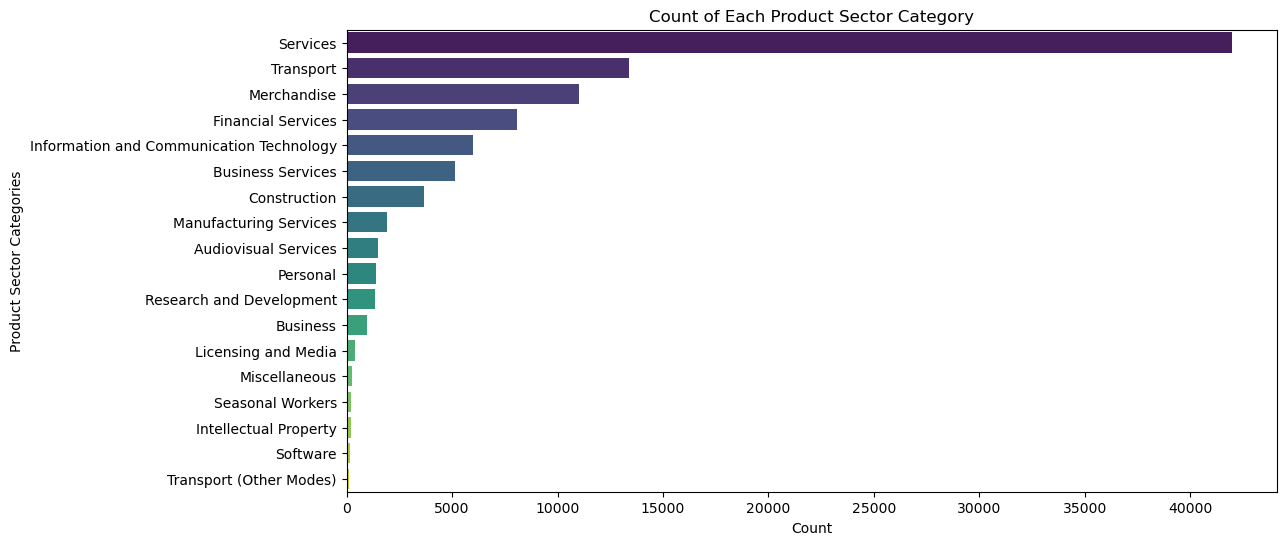

In [84]:
category_counts = df['Product_Sector_Categorized'].value_counts().reset_index()
category_counts.columns = ['Product_Sector_Categorized', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Product_Sector_Categorized', data=category_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Product Sector Categories')
plt.title('Count of Each Product Sector Category')
plt.show()

## Period_Code Column

In [85]:
df.Period_Code.isna().sum() 

0

In [86]:
df.Period_Code.unique()

array(['A', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

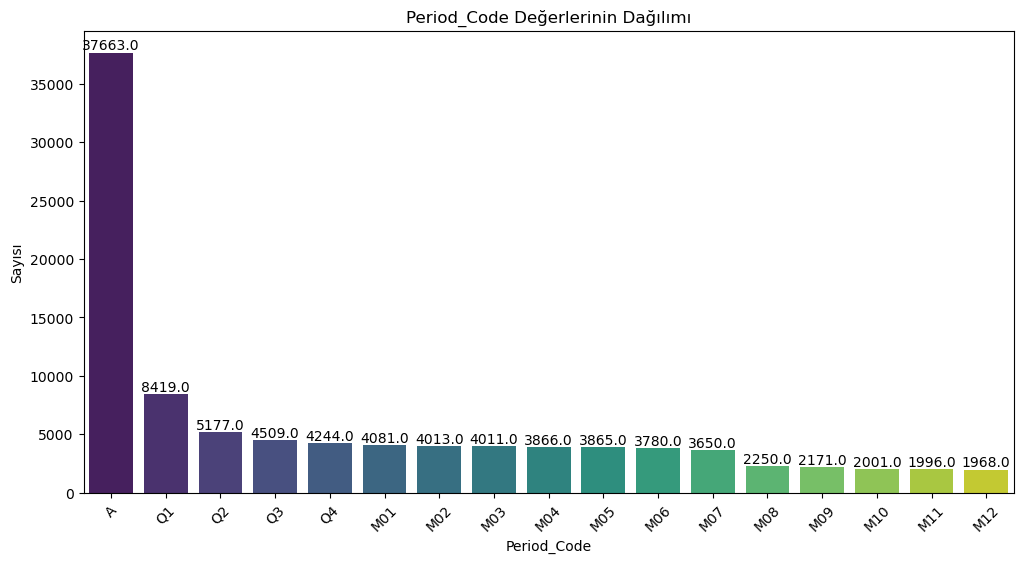

In [87]:
period_counts = df['Period_Code'].value_counts().reset_index()
period_counts.columns = ['Period_Code', 'Count']

# Bar grafiği çizimi
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=period_counts, x='Period_Code', y='Count', palette='viridis')

# Barların üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Period_Code Değerlerinin Dağılımı')
plt.xlabel('Period_Code')
plt.ylabel('Sayısı')
plt.xticks(rotation=45)  # X eksenindeki etiketlerin okunabilirliğini artırmak için
plt.show()

## Period Column

In [88]:
df.Period.isna().sum() 

0

In [89]:
df.Period.unique() 

array(['Annual', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'First Quarter', 'Second Quarter', 'Third Quarter',
       'Fourth Quarter'], dtype=object)

In [90]:
df.Period.value_counts() 

Period
Annual            37663
First Quarter      8419
Second Quarter     5177
Third Quarter      4509
Fourth Quarter     4244
January            4081
February           4013
March              4011
April              3866
May                3865
June               3780
July               3650
August             2250
September          2171
October            2001
November           1996
December           1968
Name: count, dtype: int64

## Frequency_Code Column

In [91]:
df.Frequency_Code.isna().sum() 

0

In [92]:
df.Frequency_Code.unique() 

array(['A', 'M', 'Q'], dtype=object)

## Frequency Column  

In [93]:
df.Frequency.isna().sum() 

0

In [94]:
df.Frequency.unique() 

['Annual', 'Monthly', 'Quarterly']
Categories (3, object): ['Annual', 'Monthly', 'Quarterly']

In [95]:
df.drop('Frequency_Code', axis=1, inplace=True)


## Unit_Code Column

In [96]:
df.Unit_Code.unique() 

array(['IDP', 'ID15', 'APC', 'MPC', 'ID0501', 'ID05Q1', 'USM', 'YOY'],
      dtype=object)

In [97]:
df.Unit_Code.isna().sum()  

0

## Unit Column

In [98]:
df.Unit.unique() 

['Previous year=100', '2015=100', '% change over previous year', '% change over previous month', 'January 2005=100', '2005Q1=100', 'Million US dollar', '% change over the same period of the previous...]
Categories (8, object): ['% change over previous month', '% change over previous year', '% change over the same period of the previous..., '2005Q1=100', '2015=100', 'January 2005=100', 'Million US dollar', 'Previous year=100']

In [99]:
df.Unit.value_counts()  

Unit
Million US dollar                                     78532
% change over the same period of the previous year    12828
2005Q1=100                                             2160
2015=100                                               1558
Previous year=100                                      1558
% change over previous year                             536
% change over previous month                            252
January 2005=100                                        240
Name: count, dtype: int64

In [100]:
# Names of Unit indices to be adjusted later

## Year	Column 

In [101]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
df['Year'][:10]  

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
5   2021-01-01
6   2021-01-01
7   2021-01-01
8   2021-01-01
9   2021-01-01
Name: Year, dtype: datetime64[ns]

In [102]:
df.Year.unique()

<DatetimeArray>
['2021-01-01 00:00:00', '2023-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 3, dtype: datetime64[ns]

In [103]:
df['Year'] = df['Year'].dt.year
# (Burada daha önce yaptığımız yıl sütununu sadece year olarak saklamak oldukça doğru seçenek olacak)
# Here it will be quite the right option to keep the year column as year only, which we did before

In [104]:
df.Year.value_counts() 

Year
2021    81083
2022    16527
2023       54
Name: count, dtype: int64

## Value_Flag_Code Column

In [105]:
df["Value_Flag_Code"].isna().sum() 

87572

In [106]:
missing_values = df["Value_Flag_Code"].isna().sum()
missing_percentage = round((missing_values / len(df)) * 100, 2)
missing_percentage 

89.67

In [107]:
df = df.drop(['Value_Flag_Code', 'Value_Flag'], axis=1)
# (Bu satırda oldukça yüksek sayıda null değer olduğundan silebiliriz.)
# Since this column has 89.7% null values, we can delete it.

## Text_Value Column

In [108]:
df.Text_Value.isna().sum() 

97664

In [109]:
missing_values = df["Text_Value"].isna().sum()
missing_percentage = round((missing_values / len(df)) * 100, 2)
missing_percentage 

100.0

In [110]:
df = df.drop(['Text_Value'], axis=1)
# (İçine önemli bir bilgi saklanmadığı görüldüğü için silinmesi oldukça muhtemel)
# It is very likely to be deleted as it does not appear to contain any information

## Value Column 

In [111]:
df.Value.isna().sum() 

0

In [112]:
df.Value.dtype

dtype('float64')

In [113]:
df["Value"].sample(10) 

31782       0.000000
47902    1066.031288
73507       9.000000
62304       3.141617
19938     491.015283
44154     675.784740
40724      17.000000
74354      25.000000
68240     591.957906
31078     354.976000
Name: Value, dtype: float64

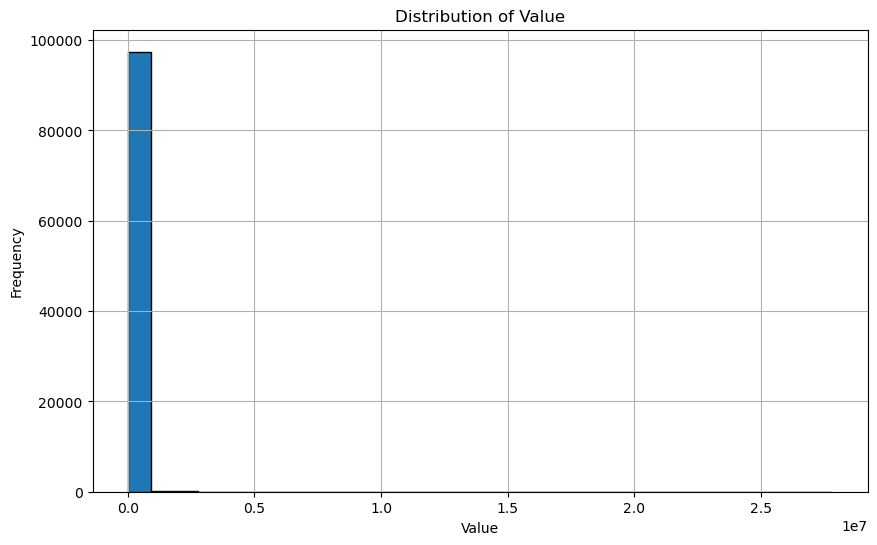

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=30, edgecolor='black')  # replace 'column_name' with your column name
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show() 

In [115]:
df["Value"].describe()

count    9.766400e+04
mean     1.750400e+04
std      2.852334e+05
min     -2.422000e+03
25%      9.000000e+00
50%      9.199326e+01
75%      8.760666e+02
max      2.781298e+07
Name: Value, dtype: float64

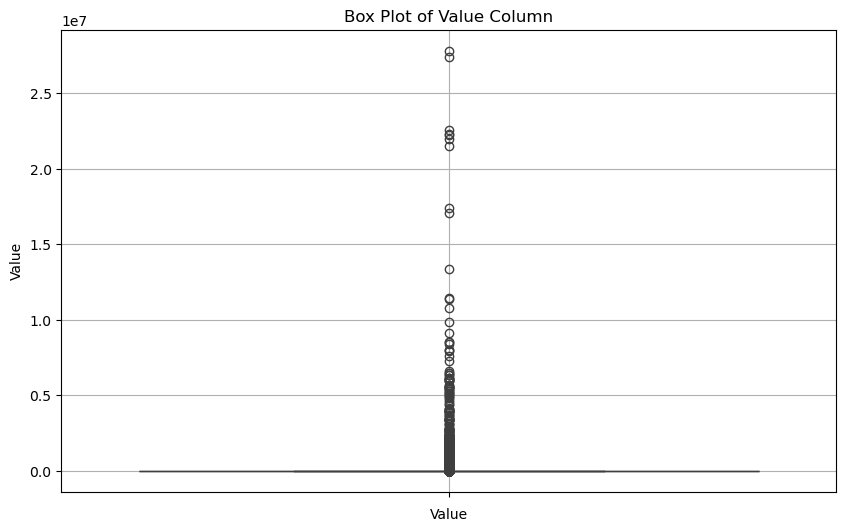

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value Column')
plt.xlabel('Value')
plt.grid(True)
plt.show()

In [117]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def detect_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]


outliers = detect_outliers(df, 'Value')
outliers.shape[0]


17929

In [118]:
outliers_ratio = round((outliers.shape[0]/len(df)) * 100, 2)
print(f"%{outliers_ratio}")

%18.36


In [119]:
def replace_outliers_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe[col_name] = dataframe[col_name].clip(lower=low_limit, upper=up_limit)

replace_outliers_with_thresholds(df, 'Value')

In [120]:
# After correcting outliers 

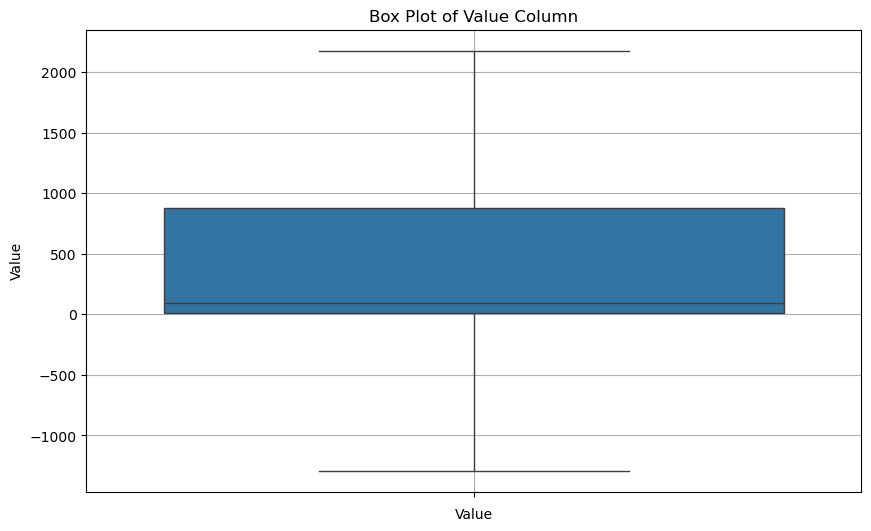

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value Column')
plt.xlabel('Value')
plt.grid(True)
plt.show()

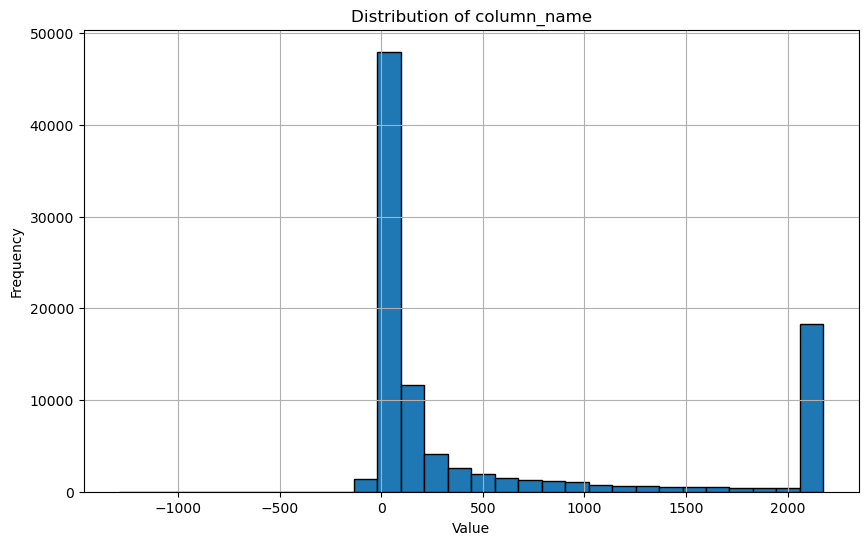

In [122]:
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=30, edgecolor='black')  # replace 'column_name' with your column name
plt.title('Distribution of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show() 

In [123]:
df["Value"][:10]

0    126.432
1     85.260
2    138.571
3    104.676
4    101.862
5    123.595
6    119.555
7    109.074
8    149.183
9    123.293
Name: Value, dtype: float64

In [124]:
df.columns

Index(['Indicator_Category', 'Indicator_Code', 'Indicator',
       'Reporting_Economy_Code', 'Reporting_Economy_ISO3A_Code',
       'Reporting_Economy', 'Partner_Economy_Code',
       'Partner_Economy_ISO3A_Code', 'Partner_Economy',
       'Product_Sector_Classification_Code', 'Product_Sector_Classification',
       'Product_Sector_Code', 'Product_Sector', 'Period_Code', 'Period',
       'Frequency', 'Unit_Code', 'Unit', 'Year', 'Value',
       'Product_Sector_Categorized'],
      dtype='object')

##  Economic Indicators Analysis

How do the values of economic indicators vary by reporting economy?

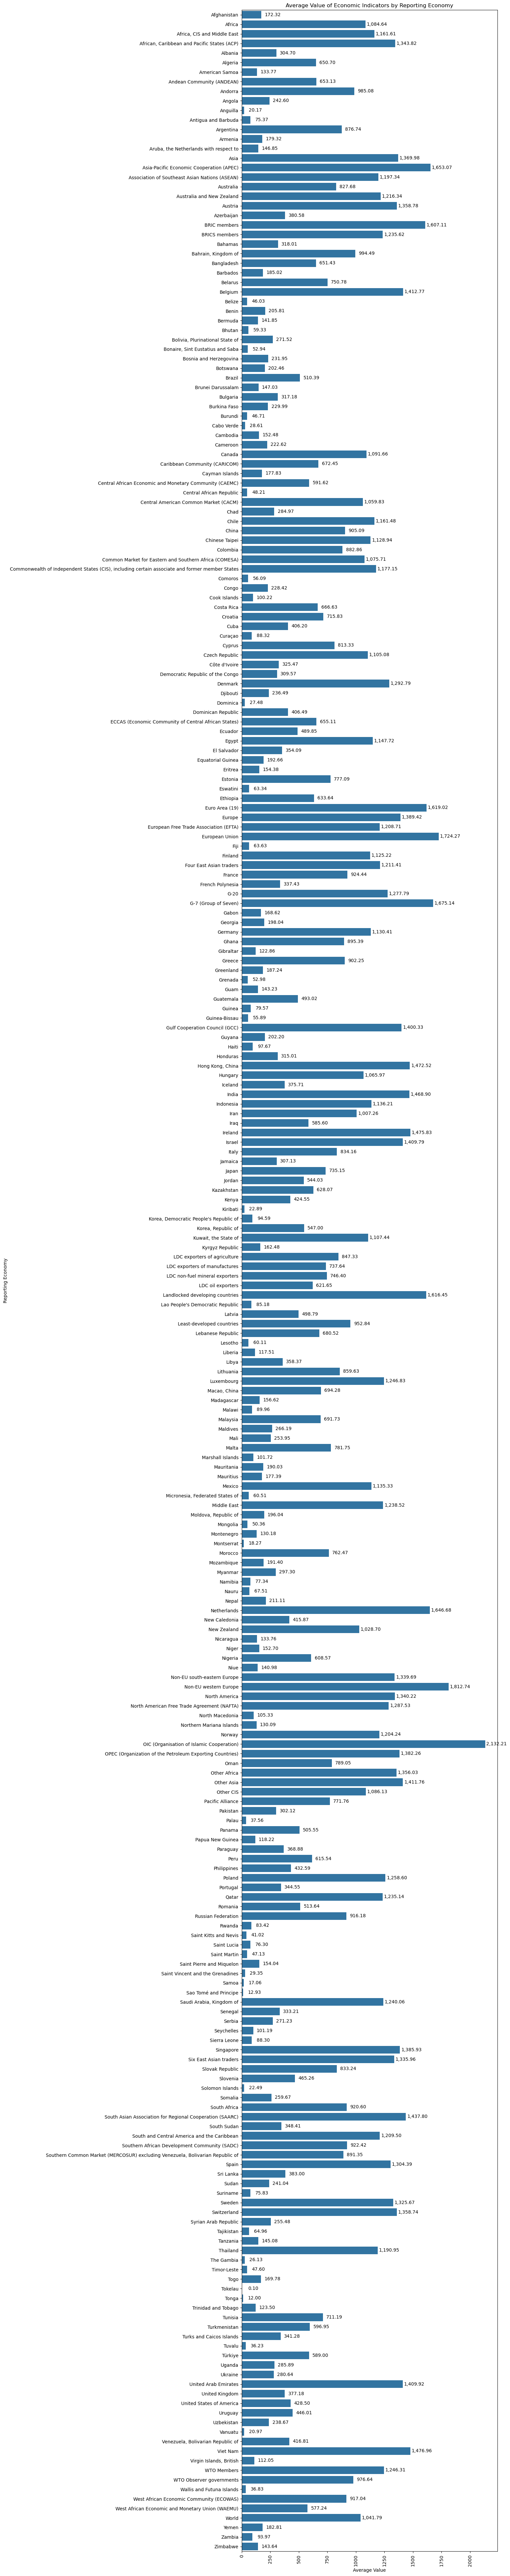

In [125]:
avg_values_by_economy = df.groupby('Reporting_Economy')['Value'].mean().reset_index().sort_values(by='Value', ascending=True)

plt.figure(figsize=(10, 100))  
ax = sns.barplot(x='Value', y='Reporting_Economy', data=avg_values_by_economy) 

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}', (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Average Value of Economic Indicators by Reporting Economy')
plt.xlabel('Average Value')
plt.ylabel('Reporting Economy')
plt.xticks(rotation=90)
plt.show()

## Are there a relation between Year - Value Columns?

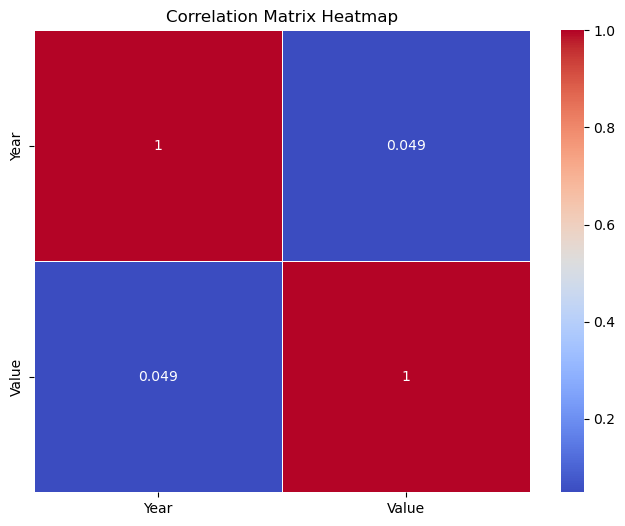

In [126]:
numeric_columns = df[[ 'Year', 'Value']]


correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()